In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds

# Simulated user-movie rating data (10 users, 6 movies)
ratings_matrix = np.array([
    [5, 4, 0, 1, 2, 0],
    [4, 0, 0, 1, 3, 0],
    [0, 1, 3, 5, 0, 4],
    [2, 0, 4, 4, 5, 0],
    [0, 3, 5, 0, 4, 2],
    [3, 4, 0, 2, 0, 5],
    [5, 0, 2, 4, 3, 0],
    [0, 2, 4, 0, 5, 3],
    [3, 5, 0, 0, 4, 2],
    [4, 0, 3, 2, 0, 5],
])

# Movie names as columns
movie_names = ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E', 'Movie F']

# Creating a DataFrame
ratings_df = pd.DataFrame(ratings_matrix, columns=movie_names)

# Convert DataFrame to a NumPy array before passing it to svds
U, sigma, Vt = svds(ratings_df.to_numpy(), k=5)  # Convert DataFrame to NumPy array
sigma = np.diag(sigma)  # Convert to diagonal matrix

print(f"{U}\n")
print(f"{sigma}\n")
print(f"{Vt}\n")

# Reconstruct Approximate Ratings Matrix
reconstructed_matrix = np.dot(np.dot(U, sigma), Vt)
predicted_ratings = pd.DataFrame(reconstructed_matrix, columns=ratings_df.columns)

print("Predicted Ratings:")
print(predicted_ratings)

[[-0.15946865 -0.04477268  0.15346621 -0.50682148  0.28914825]
 [ 0.27871397  0.23381611  0.23543043 -0.24908795  0.21039165]
 [-0.51462818  0.15923813 -0.49924309  0.31426169  0.27808628]
 [-0.23618162  0.36605705  0.31276125  0.29630614  0.36631475]
 [ 0.06896064 -0.36253534  0.18737975  0.37408921  0.33305001]
 [-0.14573011 -0.24202499 -0.48676891 -0.29868133  0.31048383]
 [-0.02874265  0.52893339  0.14766454 -0.1373955   0.34327764]
 [ 0.23601376 -0.33759003  0.18118561  0.37130339  0.3399527 ]
 [-0.16116636 -0.41540444  0.17463288 -0.32946532  0.33662582]
 [ 0.68393588  0.16632653 -0.46558839  0.00922206  0.32644038]]

[[ 3.69860775  0.          0.          0.          0.        ]
 [ 0.          7.5211491   0.          0.          0.        ]
 [ 0.          0.          7.99486774  0.          0.        ]
 [ 0.          0.          0.          8.2581428   0.        ]
 [ 0.          0.          0.          0.         17.34332367]]

[[ 0.41001651 -0.50352611  0.21482936 -0.65894555  

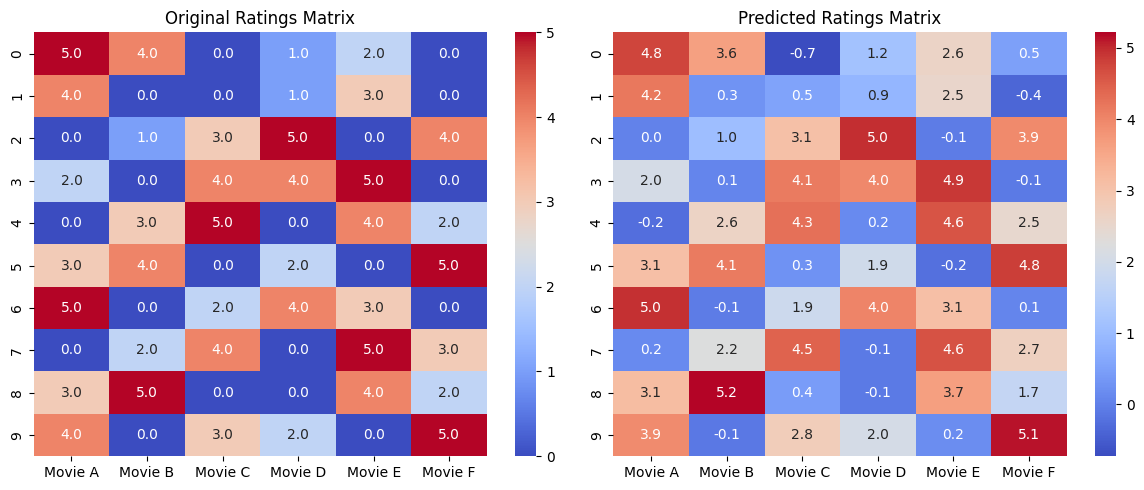

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Original and Predicted Ratings
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(ratings_df, annot=True, cmap="coolwarm", fmt=".1f", ax=axes[0])
axes[0].set_title("Original Ratings Matrix")

sns.heatmap(predicted_ratings, annot=True, cmap="coolwarm", fmt=".1f", ax=axes[1])
axes[1].set_title("Predicted Ratings Matrix")

plt.tight_layout()
plt.show()